Título: Lunar Lander

O objetivo é treinar um agente para pousar na lua utilizando um algoritmo de Q-Learning . Este ambiente é um problema clássico de otimização de trajetória de foguete. De acordo com o princípio máximo de Pontryagin, é ideal ligar o motor a toda velocidade ou desligá-lo. Esta é a razão pela qual este ambiente possui ações discretas: ligar ou desligar o motor.

Barema:
- Uso dos recursos do gymnasium (peso 2)
- Implementaçao da função de Q-Learning (peso 3)
- CrIar uma interface para a visualização do treinamento(peso 2)
- Fazer uma análise dos resultados atraves de um gráfico recompensa X episódio (peso 2)
- clareza do código (peso 1)

Atribuição de nota:
Não deu a largada (0 - 4); No caminho (4,1 - 7); Chegou lá (7,1 - 9); Foi mais longe (9,1 - 10)"
Entrega: código python  no github.

In [ ]:
# OBSERVATION SPACE
# 0: Horizontal pad coordinate (x)
# 1: Vertical pad coordinate (y)
# 2: Horizontal speed (x)
# 3: Vertical speed (y)
# 4: Angle
# 5: Angular speed
# 6: If the left leg contact point has touched the land (boolean)
# 7: If the right leg contact point has touched the land (boolean)

# ACTIONS
# Action 0: Do nothing,
# Action 1: Fire left orientation engine,
# Action 2: Fire the main engine,
# Action 3: Fire right orientation engine.

In [19]:
!pip install swig
!pip install gymnasium[box2d]

In [20]:
# Importando bibliotecas necessárias
import numpy as np
import gym
import matplotlib.pyplot as plt


In [21]:
class DiscretizeObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env, bins):
        super().__init__(env)
        self.bins = bins

    def observation(self, observation):
        return tuple(np.digitize(observation[i], self.bins[i]) for i in range(len(observation)))

In [22]:
class QLearningAgent:
    """
    Classe para implementar um agente Q-learning.
    """
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.05):
        self.env = env
        self.alpha = alpha  # taxa de aprendizagem
        self.gamma = gamma  # fator de desconto
        self.epsilon = epsilon  # probabilidade de exploração
        self.num_actions = env.action_space.n
        self.num_states = 10 ** env.observation_space.shape[0]  # Número total de estados discretos
        self.Q = np.zeros((self.num_states, self.num_actions))  # Tabela Q inicializada com zeros

    def discretize_state(self, state):
        """Função para discretizar um estado"""
        discrete_state = 0
        for i, s in enumerate(state):
            discrete_state += min(s, 9) * (10 ** i)  # Limitando o valor máximo para 9
        return discrete_state

    def choose_action(self, state):
        """Função para escolher a ação usando a política epsilon-greedy"""
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()  # ação aleatória
        else:
            return np.argmax(self.Q[state, :])  # ação com maior valor Q

    def train(self, num_episodes=4000):
        """Função para treinar o agente"""
        episode_rewards = []  # Lista para armazenar as recompensas de cada episódio

        for episode in range(num_episodes):
            observation = self.env.reset(seed=42)  # Apenas atribuir a observação inicial a uma variável
            state = self.discretize_state(observation)
            total_reward = 0

            # Loop de passos no episódio
            while True:
                action = self.choose_action(state)  # Ação escolhida baseada no estado atual
                next_observation, reward, terminated, _ = self.env.step(action)
                next_state = self.discretize_state(next_observation)
                total_reward += reward

                # Atualizar o valor Q
                self.Q[state, action] = self.Q[state, action] + self.alpha * (
                    reward + self.gamma * np.max(self.Q[next_state, :]) - self.Q[state, action]
                )

                state = next_state

                if terminated:
                    break

                # Verificar se o número máximo de passos foi atingido
                if self.env.spec.max_episode_steps is not None and len(episode_rewards) >= self.env.spec.max_episode_steps:
                    break

            episode_rewards.append(total_reward)

            print(f"Episode {episode + 1}, Total Reward: {total_reward}")

        return episode_rewards

In [23]:
# Criar o ambiente Lunar Lander
env = gym.make("LunarLander-v2")

# Definir os bins para discretização
bins = [np.linspace(env.observation_space.low[i], env.observation_space.high[i], 10) for i in range(env.observation_space.shape[0])]

# Aplicar a discretização usando a classe wrapper
env = DiscretizeObservationWrapper(env, bins)

# Criar o agente Q-Learning
agent = QLearningAgent(env)

# Treinar o agente
episode_rewards = agent.train()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1, Total Reward: -212.1089293045524
Episode 2, Total Reward: -238.41884783970434
Episode 3, Total Reward: -357.8525632459044
Episode 4, Total Reward: -203.83457272952825
Episode 5, Total Reward: -383.5477433930045
Episode 6, Total Reward: -6.737181159052923
Episode 7, Total Reward: -153.58973680275352
Episode 8, Total Reward: -6.489583578944362
Episode 9, Total Reward: -296.17227797255657
Episode 10, Total Reward: -321.6145576448119
Episode 11, Total Reward: -186.28817354174006
Episode 12, Total Reward: -339.33978928509373
Episode 13, Total Reward: -295.0900758579527
Episode 14, Total Reward: -54.99561985516526
Episode 15, Total Reward: -165.2133294657409
Episode 16, Total Reward: -90.6843311056248
Episode 17, Total Reward: 5.782020820998298
Episode 18, Total Reward: -57.923961739646415
Episode 19, Total Reward: -306.24489700336545
Episode 20, Total Reward: -269.6292455947056
Episode 21, Total Reward: 4.951212068021036
Episode 22, Total Reward: -126.19312269109713
Episode 23, T

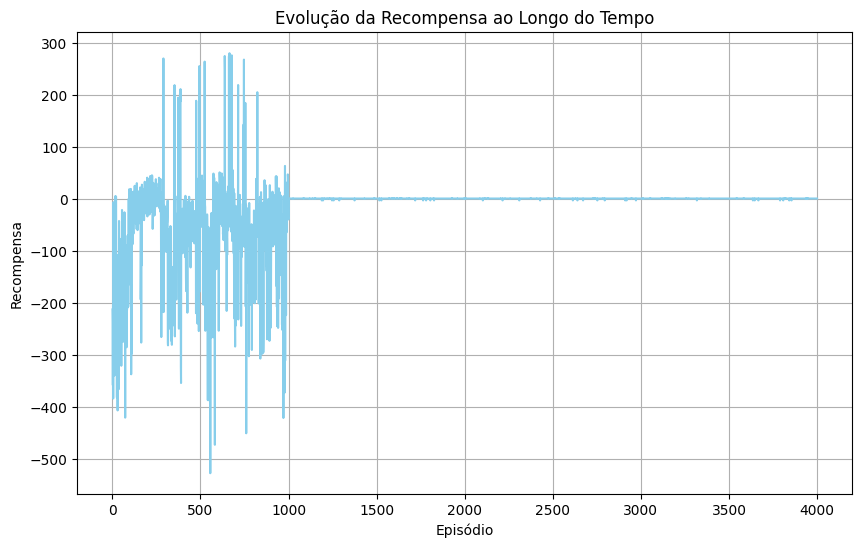

In [25]:
# Plotar o gráfico de linha da evolução da recompensa ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(episode_rewards) + 1), episode_rewards, color='skyblue')
plt.title('Evolução da Recompensa ao Longo do Tempo')
plt.xlabel('Episódio')
plt.ylabel('Recompensa')
plt.grid(True)
plt.show()